In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from numpy.typing import _256Bit

from b1_load_data import NFLData
from b2_animate_data import AnimatePlay, open_html_plot
from b3_fit_control_data import calcProjfromtrack
from b5_single_bell import BayesZArr, FieldSetup

In [3]:
path_to_data = "input/nfl-big-data-bowl-2022/"
path_to_punts = "input/BDB2022-custom/punts_only/"
data = NFLData(data_path=path_to_data, punts_path=path_to_punts)

In [4]:
saved_punts = pd.read_csv("input/BDB2022-custom/punts_from_2018.csv", index_col=0)
one_data = data.one_play(90)

one_track = one_data["track"]
one_row = one_data["row"]
calc_proj = calcProjfromtrack(one_track)
BA = BayesZArr(one_track, one_row, calc_proj, saved_punts)
targetdf = BA.calc_center()

Reading PFF Scouting Data
Reading in Games Data
Reading in Plays Data
Taking Punts Only
Reading in Tracking Data
Taking Subset of Week 1
Standardizing moving right


In [5]:
vx_0, vy_0  = (7.234239637424888, 1.557491020760191)

In [6]:
sin_ang, cos_ang = 0.2104, 0.9776

In [7]:
cos_refl = cos_ang if sin_ang < 0 else -cos_ang
perp_vec = np.array([np.abs(sin_ang), cos_refl])

In [8]:
np.dot(perp_vec, np.array([vx_0, vy_0]))

-0.0005192021809663494

In [12]:
VMAX = 11.3
A_CONST = 5
SS_SNAP = 2  ## seconds since snap
MAG_AR = 7
sing_gunner = calc_proj.query(f"gunnerJerseyRank == 1")

targetXY = targetdf.query(f"time_since_snap == {SS_SNAP}").iloc[0]
gunnerXY = sing_gunner[sing_gunner["time_since_snap"] == SS_SNAP].iloc[0]

SX, SY = gunnerXY["x"], gunnerXY["y"]
TX, TY = targetXY["post_x"], targetXY["post_y"]

In [13]:
R = 10

In [14]:
def findCxy(sin_ang, cos_ang, TX, TY, perp_vec, t1x, t1y, R):
    """find center of circle given location and direction of player"""
    xdiff = TX - t1x
    slope = sin_ang / cos_ang
    y_at_T = t1y + xdiff * slope

    if TY >= y_at_T:
        center_x = t1x + R * perp_vec[0]
        center_y = t1y + R * np.abs(perp_vec[1])

    else:
        center_x = t1x - R * perp_vec[0]
        center_y = t1y - R * np.abs(perp_vec[1])

    return np.array([center_x, center_y])

In [15]:
findCxy(sin_ang, cos_ang, TX, TY, perp_vec, SX, SY, R)

array([25.84600076, 38.23399832])

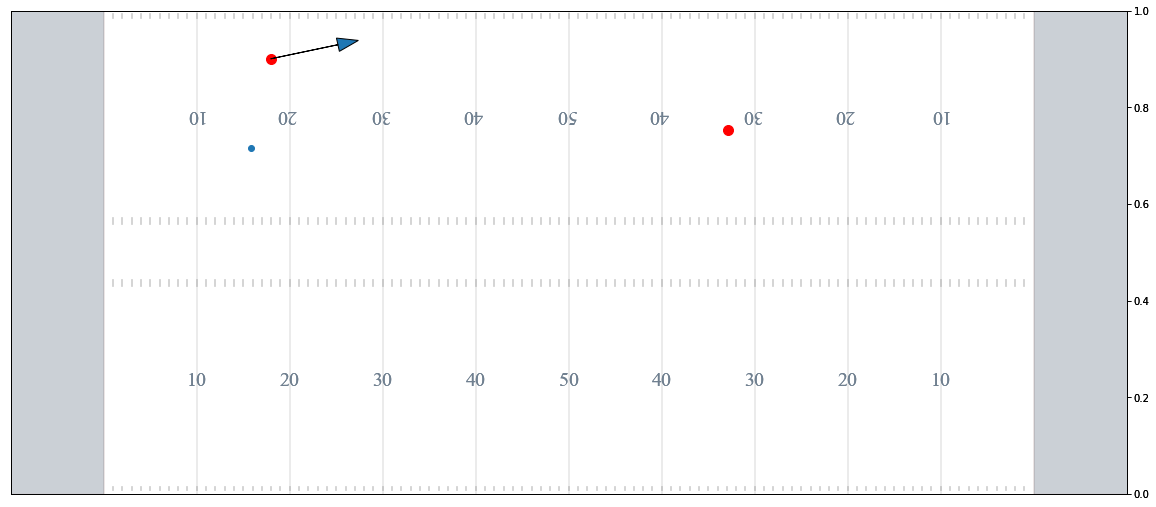

In [24]:
field = FieldSetup()
ax = field.setup_plot()
ax.scatter([SX, TX], [SY, TY], c="r", s=100)
ax.scatter([25.8], [38.2])
ax.arrow(SX, SY, vx_0, vy_0, head_width=1.5)
field.fig

In [25]:
xdiff = TX - SX
slope = sin_ang / cos_ang
y_at_T = SY + xdiff*slope
y_at_T

58.59940027075233

In [26]:
TY > y_at_T

False

In [27]:
perp_vec

array([ 0.2104, -0.9776])

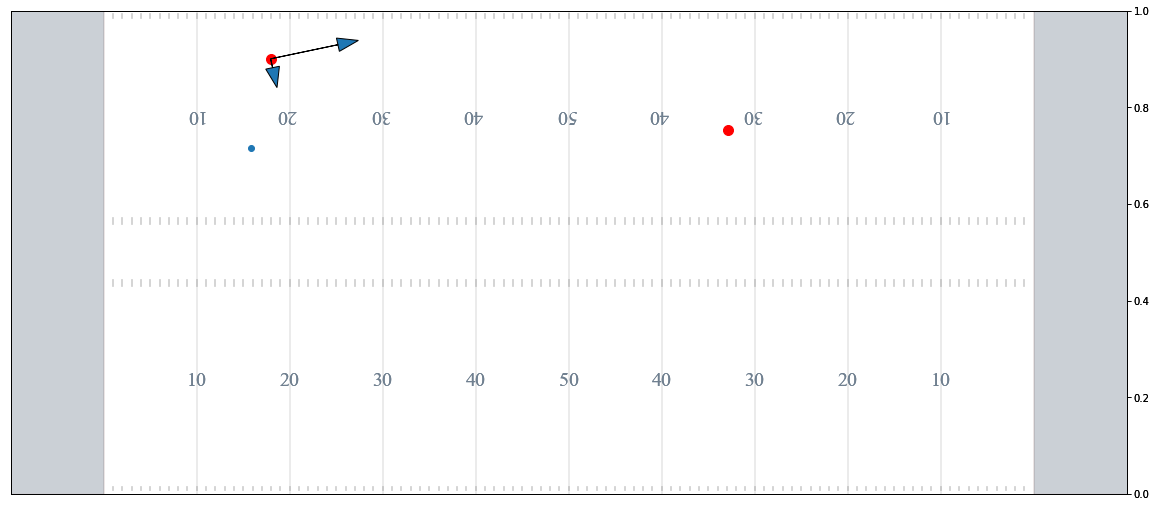

In [28]:
field = FieldSetup()
ax = field.setup_plot()
ax.scatter([SX, TX], [SY, TY], c="r", s=100)
ax.scatter([25.8], [38.2])
ax.arrow(SX, SY, vx_0, vy_0, head_width=1.5)
ax.arrow(SX, SY, perp_vec[0], perp_vec[1], head_width=1.5)
field.fig

In [29]:
def findCxy(sin_ang, cos_ang, TX, TY, perp_vec, t1x, t1y, R):
    """find center of circle given location and direction of player"""
    xdiff = TX - t1x
    slope = sin_ang / cos_ang
    y_at_T = t1y + xdiff * slope

    if TY >= y_at_T:
        center_x = t1x + R * perp_vec[0]
        center_y = t1y + R * np.abs(perp_vec[1])

    else:  ## R below t1x
        if perp_vec[1] < 0:
            center_x = t1x + R * perp_vec[0]
            center_y = t1y + R * perp_vec[1]
        else:
            center_x = t1x - R * perp_vec[0]
            center_y = t1y - R * perp_vec[1]

    return np.array([center_x, center_y])
findCxy(sin_ang, cos_ang, TX, TY, perp_vec, SX, SY, R)

array([30.05400076, 38.23399832])

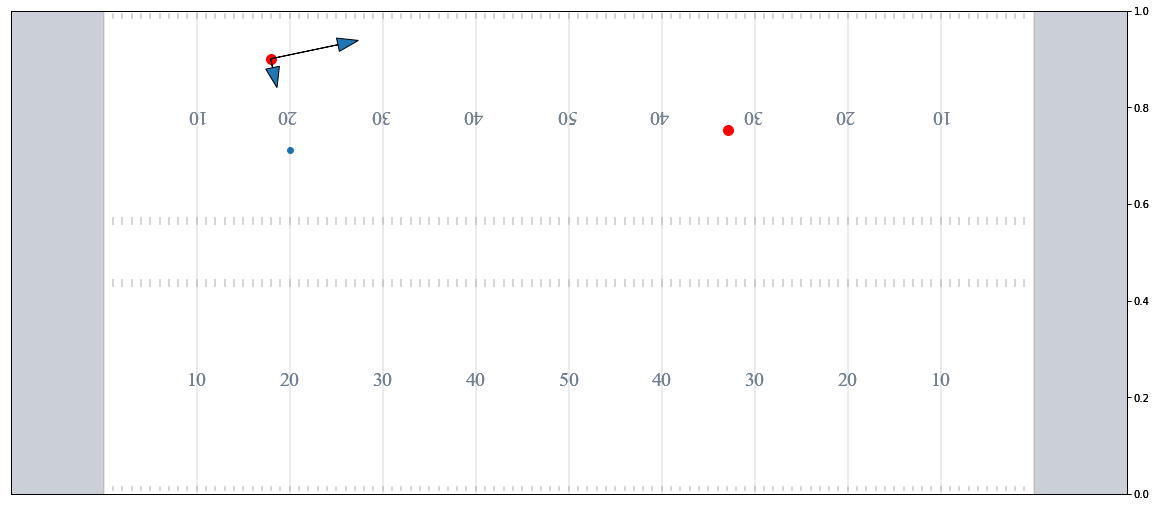

In [30]:
field = FieldSetup()
ax = field.setup_plot()
ax.scatter([SX, TX], [SY, TY], c="r", s=100)
ax.scatter([30], [38])
ax.arrow(SX, SY, vx_0, vy_0, head_width=1.5)
ax.arrow(SX, SY, perp_vec[0], perp_vec[1], head_width=1.5)
field.fig